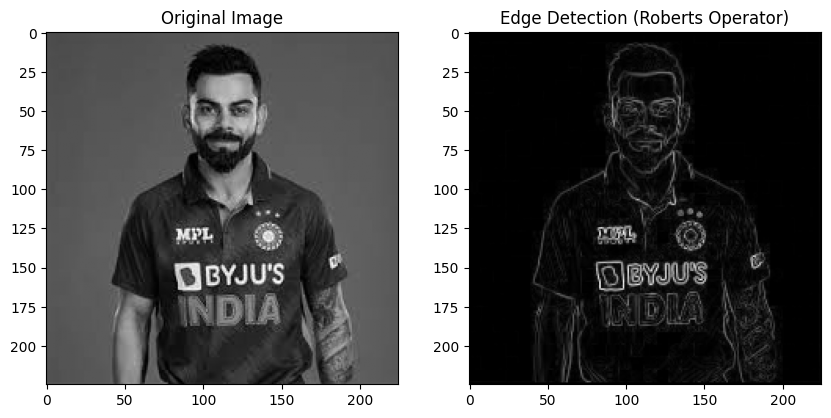

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Load the image
image = io.imread('/content/diksha.jfif')
# Convert the image to grayscale (if it's in color)
image_gray = color.rgb2gray(image)

# Define the Roberts Cross operator kernels
kernel_x = np.array([[1, 0], [0, -1]])  # X-direction kernel (diagonal gradient)
kernel_y = np.array([[0, 1], [-1, 0]])  # Y-direction kernel (diagonal gradient)

# Function to apply the Roberts operator (edge detection)
def apply_roberts_operator(image):
    # Get the image dimensions
    rows, cols = image.shape

    # Initialize empty arrays for gradients in X and Y directions
    grad_x = np.zeros_like(image)
    grad_y = np.zeros_like(image)

    # Apply the Roberts kernels manually
    for i in range(rows - 1):
        for j in range(cols - 1):
            # Apply kernel_x and kernel_y
            grad_x[i, j] = np.abs(image[i, j] - image[i + 1, j + 1])
            grad_y[i, j] = np.abs(image[i, j + 1] - image[i + 1, j])

    # Calculate the gradient magnitude
    grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    return grad_magnitude

# Apply the Roberts operator to the grayscale image
gradient_magnitude = apply_roberts_operator(image_gray)

# Display the original image and edge-detected result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Edge Detection (Roberts Operator)")
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()
